# Black Friday Sales Analysis

This patricular dataset contains the Sales details of a retail store. we will analyse various features in the dataset and go through the complete data analysis process. Before getting into the process the details about dataset provided[Black friday](https://www.kaggle.com/mehdidag/black-friday) were not completly clear.
1. Product category 1,2,3 what are these?
2. occupation id what each id means?
3. what does purchase tell is it price of that product or total price for which they bought?

Even though data is not clear the major reason of this kernel is to provide the insight on how to analyse a dataset, what is the process or steps in the analysis.

## Importing necessary libraries

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Loading the data

In [15]:
data = pd.read_csv('BlackFriday.csv')

## Data Preprocessing

In [16]:
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [17]:
data.shape

(537577, 12)

In [40]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [19]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [20]:
data.duplicated().sum()

0

### Convert NaN to 0

Converting NaN values to 0 so that features contained datset will have significance while performing EDA.

In [21]:
data = data.fillna(0)

### Change in data type

Data looks good but in columns like Product_Category_2, Product_Category_3 data type should be of 'int64' instead
of 'float64'.

In [22]:
data['Product_Category_2'] = data['Product_Category_2'].astype('int64')
data['Product_Category_3'] = data['Product_Category_3'].astype('int64')


## Questions after preprocessing the dataset

#### 1. Which age group of customers are more likely to purchase with average amount per person?

In [23]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

Text(0.5, 1.0, 'Age group vs Average Purchase')

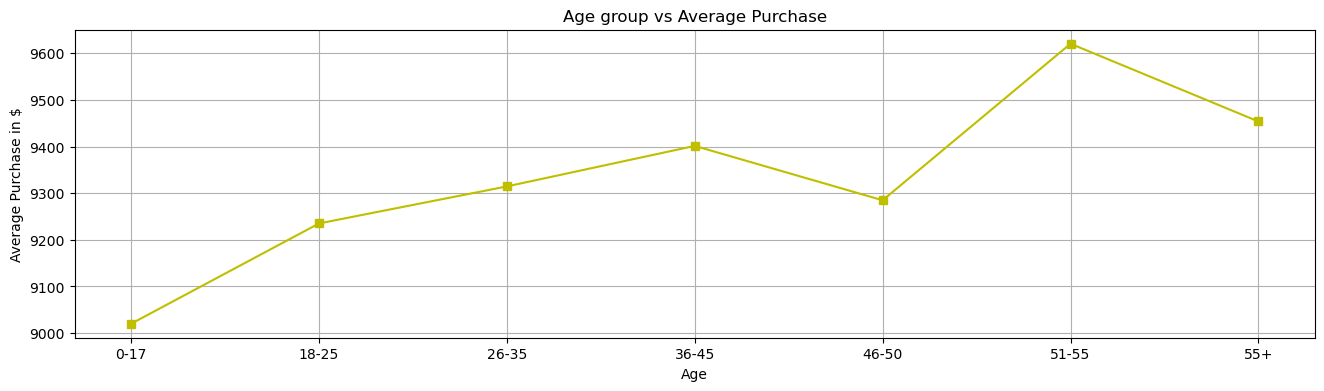

In [31]:
data1 = data.groupby('Age')['Purchase'].mean()
data1 = pd.DataFrame({'Age': data1.index, 'Average_purchase': data1.values})
plt.figure(figsize=(16,4))
plt.plot('Age','Average_purchase','ys-',data=data1)
plt.grid()
plt.xlabel('Age')
plt.ylabel('Average Purchase in $')
plt.title('Age group vs Average Purchase')

#### 2. Which age group and gender have high visiting rate to the retail store?

In [32]:
data2 = data.groupby(['Age','Gender'])['User_ID'].count()
data2 = pd.DataFrame({'Age': data2.index.get_level_values(0), 'Gender': data2.index.get_level_values(1), 'Visiting_rate': data2.values})
fig = px.bar(data2, x='Age', y='Visiting_rate', color='Gender', title='Age group and Gender vs Visiting rate')
fig.show()

#### 3. Which occupation type have high average purchase rate?

Text(0.5, 1.0, 'Occupation group vs Average Purchase')

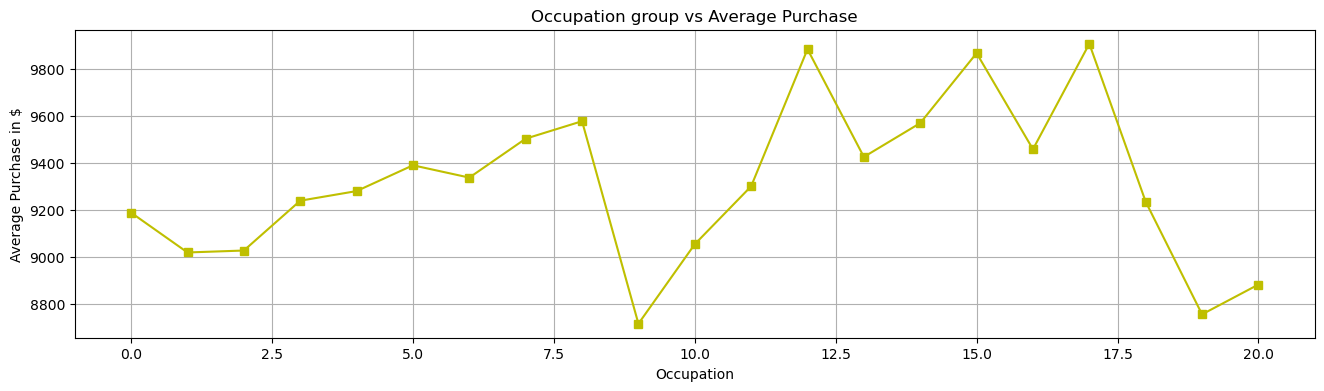

In [50]:
data1 = data.groupby('Occupation')['Purchase'].mean()
data1 = pd.DataFrame({'Occupation': data1.index, 'Average_purchase': data1.values})
plt.figure(figsize=(16,4))
plt.plot('Occupation','Average_purchase','ys-',data=data1)
plt.grid()
plt.xlabel('Occupation')
plt.ylabel('Average Purchase in $')
plt.title('Occupation group vs Average Purchase')

#### 4. Who has high purchase rate newly settled or people staying from long time?

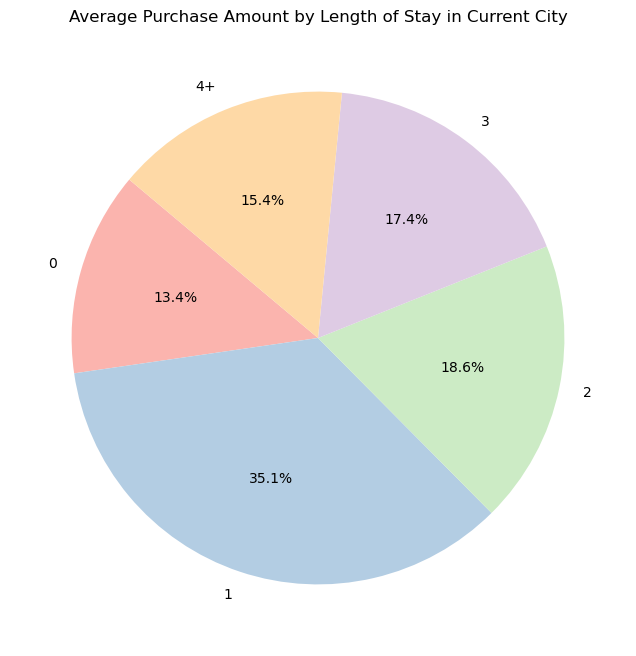

In [67]:
stay_purchase = data.groupby('Stay_In_Current_City_Years')['Purchase'].sum()

# Plotting the data as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(stay_purchase, labels=stay_purchase.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Average Purchase Amount by Length of Stay in Current City')
plt.show()

#### 5. Top 10 products which made highest sales in the store?


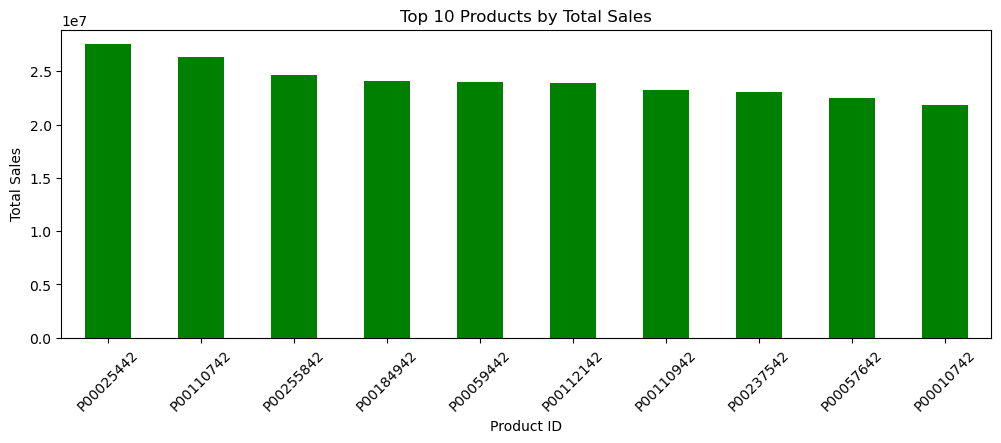

In [64]:
product_sales = data.groupby('Product_ID')['Purchase'].sum()

# Sort the products by total sales in descending order and select the top 10
top_10_products = product_sales.sort_values(ascending=False).head(10)

# Plotting the data as a bar chart
plt.figure(figsize=(12, 4))
top_10_products.plot(kind='bar', color='green')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

#### 6. Based on marital status and gender who has high purchase rate?

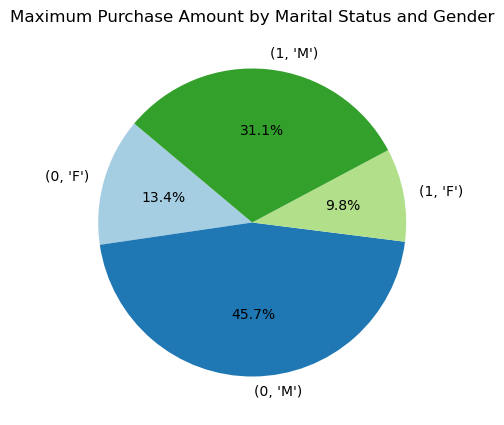

In [70]:
marital_gender_purchase = data.groupby(['Marital_Status', 'Gender'])['Purchase'].sum().unstack()

# Flatten the DataFrame for pie chart plotting
marital_gender_purchase_flat = marital_gender_purchase.stack()

# Plotting the data as a pie chart
plt.figure(figsize=(10, 5))
plt.pie(marital_gender_purchase_flat, labels=marital_gender_purchase_flat.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Maximum Purchase Amount by Marital Status and Gender')
plt.show()

#### 7. Which product is popular for each age group

In [72]:

age_product_sales = data.groupby(['Age', 'Product_ID'])['Purchase'].sum().reset_index()

# Find the most popular product for each age group
most_popular_product = age_product_sales.loc[age_product_sales.groupby('Age')['Purchase'].idxmax()]

# Display the results
for age_group, product_info in most_popular_product.iterrows():
    age = product_info['Age']
    product = product_info['Product_ID']
    purchase = product_info['Purchase']
    print(f'Age Group: {age}, Most Popular Product: {product}, Total Purchase: {purchase}')


Age Group: 0-17, Most Popular Product: P00255842, Total Purchase: 1096484
Age Group: 18-25, Most Popular Product: P00110742, Total Purchase: 5532933
Age Group: 26-35, Most Popular Product: P00110742, Total Purchase: 10605442
Age Group: 36-45, Most Popular Product: P00025442, Total Purchase: 5917938
Age Group: 46-50, Most Popular Product: P00025442, Total Purchase: 2098048
Age Group: 51-55, Most Popular Product: P00025442, Total Purchase: 2041357
Age Group: 55+, Most Popular Product: P00080342, Total Purchase: 1341782


#### 8. What is the purchase percent for each age group and for Gender Group in total purchase amount?

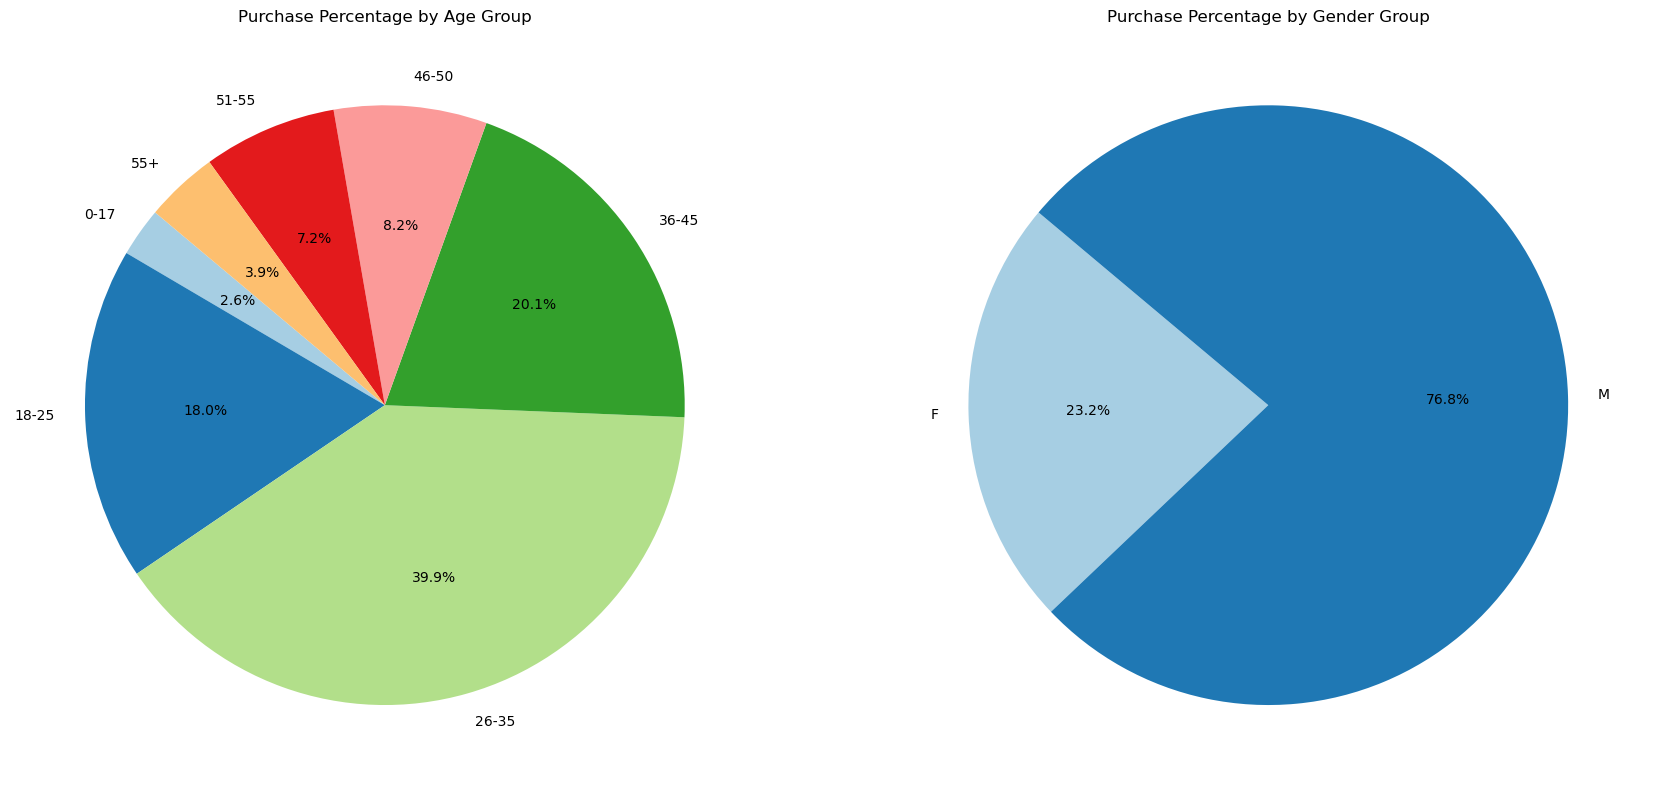

In [74]:
total_purchase_age = data.groupby('Age')['Purchase'].sum()
total_purchase_gender = data.groupby('Gender')['Purchase'].sum()

# Calculate percentage
total_purchase = data['Purchase'].sum()
age_percentage = (total_purchase_age / total_purchase) * 100
gender_percentage = (total_purchase_gender / total_purchase) * 100

# Plotting the pie charts side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart for Age Groups
axes[0].pie(age_percentage, labels=age_percentage.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axes[0].set_title('Purchase Percentage by Age Group')

# Pie chart for Gender Groups
axes[1].pie(gender_percentage, labels=gender_percentage.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axes[1].set_title('Purchase Percentage by Gender Group')

plt.tight_layout()
plt.show()